In [2]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold 
from keras.optimizers import SGD
from keras.constraints import maxnorm
# Modelling Helpers :
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score
# Deep Learning Libraries
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler
from keras.utils import to_categorical
from keras import backend as K
K.set_image_dim_ordering('th')


In [3]:
seed = 7
np.random.seed(seed)

In [7]:
pip install matplotlib

    100% |████████████████████████████████| 13.1MB 747kB/s ta 0:00:01
    100% |████████████████████████████████| 92kB 1.3MB/s ta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
import matplotlib as plt
%matplotlib inline

In [5]:
train_data = pd.read_csv("/home/sola/Downloads/Digit_Recognition/train.csv")
test_data = pd.read_csv("/home/sola/Downloads/Digit_Recognition/test.csv")

In [6]:
train_data.shape,test_data.shape

((42000, 785), (28000, 784))

In [7]:
df_train = train_data.copy()
df_test = test_data.copy()

In [8]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df_train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [9]:
df_train.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
pixel6      0
pixel7      0
pixel8      0
pixel9      0
pixel10     0
pixel11     0
pixel12     0
pixel13     0
pixel14     0
pixel15     0
pixel16     0
pixel17     0
pixel18     0
pixel19     0
pixel20     0
pixel21     0
pixel22     0
pixel23     0
pixel24     0
pixel25     0
pixel26     0
pixel27     0
pixel28     0
           ..
pixel754    0
pixel755    0
pixel756    0
pixel757    0
pixel758    0
pixel759    0
pixel760    0
pixel761    0
pixel762    0
pixel763    0
pixel764    0
pixel765    0
pixel766    0
pixel767    0
pixel768    0
pixel769    0
pixel770    0
pixel771    0
pixel772    0
pixel773    0
pixel774    0
pixel775    0
pixel776    0
pixel777    0
pixel778    0
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [26]:
df_test.isnull().sum()

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
pixel6      0
pixel7      0
pixel8      0
pixel9      0
pixel10     0
pixel11     0
pixel12     0
pixel13     0
pixel14     0
pixel15     0
pixel16     0
pixel17     0
pixel18     0
pixel19     0
pixel20     0
pixel21     0
pixel22     0
pixel23     0
pixel24     0
pixel25     0
pixel26     0
pixel27     0
pixel28     0
pixel29     0
           ..
pixel754    0
pixel755    0
pixel756    0
pixel757    0
pixel758    0
pixel759    0
pixel760    0
pixel761    0
pixel762    0
pixel763    0
pixel764    0
pixel765    0
pixel766    0
pixel767    0
pixel768    0
pixel769    0
pixel770    0
pixel771    0
pixel772    0
pixel773    0
pixel774    0
pixel775    0
pixel776    0
pixel777    0
pixel778    0
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 784, dtype: int64

In [10]:
df_train['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [11]:
# Generate Random Numbers
rdm = np.random.randint(0,42000,size=4)
print(rdm)

[10742 38467   919 13927]


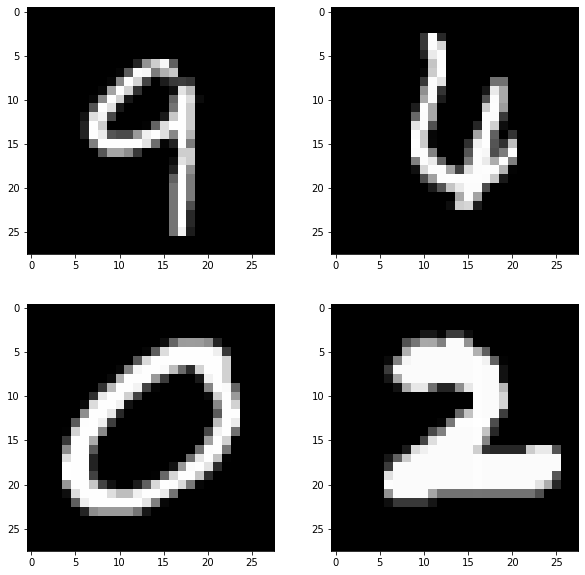

In [16]:
from matplotlib import pyplot
# from matplotlib import subplots
fig, ax = pyplot.subplots(2,2, figsize=(12,6))
fig.set_size_inches(10,10)
ax[0,0].imshow(df_train.drop('label',axis=1).values[rdm[0]].reshape(28,28),cmap='gray')
ax[0,1].imshow(df_train.drop('label',axis=1).values[rdm[1]].reshape(28,28),cmap='gray')
ax[1,0].imshow(df_train.drop('label',axis=1).values[rdm[2]].reshape(28,28),cmap='gray')
ax[1,1].imshow(df_train.drop('label',axis=1).values[rdm[3]].reshape(28,28),cmap='gray')



Text(0.5, 1.0, "Distribution of Label's")

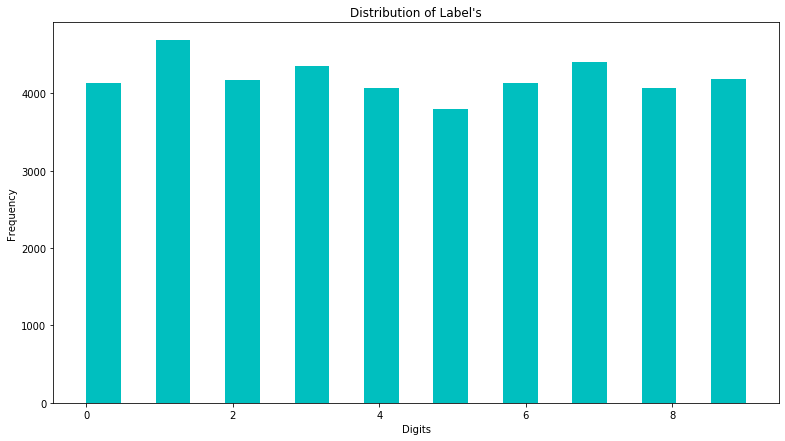

In [17]:
# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.figure(figsize=(13,7))
plt.hist( x=df_train['label'] , bins=19 ,color='c')
plt.xlabel('Digits')
plt.ylabel('Frequency')
plt.title('Distribution of Label\'s')

In [18]:
seed = 66
np.random.seed(seed)

In [19]:
X = train_data.iloc[:,1:]
Y = train_data.iloc[:,0]

In [20]:
x_train , x_test , y_train , y_test = train_test_split(X, Y , test_size=0.1, random_state=seed)

In [21]:
x_train = x_train.values.reshape(-1,28,28,1)
x_test = x_test.values.reshape(-1,28,28,1)
df_test=df_test.values.reshape(-1,28,28,1)

In [57]:
df_test_new=df_test.values.reshape(-1,28,28,1)

In [22]:
#Normalization on dataset----x-min/(max-min)----min:0,max:255
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255

In [23]:
df_test = df_test.astype("float32")/255 #Both train and validation datasets are normalized


In [25]:
df_test.shape,x_test.shape

((28000, 28, 28, 1), (4200, 28, 28, 1))

In [26]:
#Encoding the label to 0's and 1's
encoder = LabelEncoder()
encoder.fit(y_train)
y_train= encoder.transform(y_train)
y_train_new = np_utils.to_categorical(y_train)

encoder.fit(y_test)
y_test= encoder.transform(y_test)
y_test_new = np_utils.to_categorical(y_test)


In [27]:
y_train_new[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [28]:
y_test_new[0]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [51]:
# help(Conv2D)

In [29]:
#Build ConvNet
model = Sequential()
#1convolution layer and pooling layer
model.add(Conv2D(filters=32,strides=1,padding='same',kernel_size=(3,3),activation='relu',data_format='channels_last',input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(filters=32,strides=1,padding='same',kernel_size=(3,3),activation='relu',data_format='channels_last'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Dropout(0.25))

#2convolution layer and pooling layer
model.add(Conv2D(filters=64,strides=1,padding='same',kernel_size=(3,3),activation='relu',data_format='channels_last'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64,strides=1,padding='same',kernel_size=(3,3),activation='relu',data_format='channels_last'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Dropout(0.25))

#Fllaten layer
model.add(Flatten())

#Fully Connected layers
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [58]:
#help(Adam)

In [30]:
#Compile the model:
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

In [31]:
model.compile(optimizer=optimizer,loss="categorical_crossentropy", metrics=["accuracy"])

In [32]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 14, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 14, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 14, 64)        9280      
__________

In [68]:
#help(LearningRateScheduler)

In [33]:
reduce_lr = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

In [34]:
# help(ImageDataGenerator)

In [35]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

In [36]:
datagen.fit(x_train)

/home/sola/anaconda3/envs/tensorflow_cpu/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:923: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_first" (channels on axis 1), i.e. expected either 1, 3 or 4 channels on axis 1. However, it was passed an array with shape (37800, 28, 28, 1) (28 channels).
  ' channels).')


In [37]:
batch_size=64
epochs=20

In [38]:
# Fit the Model
history = model.fit_generator(datagen.flow(x_train, y_train_new, batch_size = batch_size), epochs = epochs, 
                              validation_data = (x_test, y_test_new), verbose=2, 
                              steps_per_epoch=x_train.shape[0] // batch_size,
                              callbacks = [reduce_lr])


Instructions for updating:
Use tf.cast instead.


/home/sola/anaconda3/envs/tensorflow_cpu/lib/python3.7/site-packages/keras_preprocessing/image/numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_first" (channels on axis 1), i.e. expected either 1, 3, or 4 channels on axis 1. However, it was passed an array with shape (37800, 28, 28, 1) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


Epoch 1/20
 - 267s - loss: 0.2741 - acc: 0.9214 - val_loss: 0.1588 - val_acc: 0.9581
Epoch 2/20
 - 285s - loss: 0.0958 - acc: 0.9721 - val_loss: 0.0743 - val_acc: 0.9788
Epoch 3/20
 - 292s - loss: 0.0774 - acc: 0.9772 - val_loss: 0.0624 - val_acc: 0.9855
Epoch 4/20
 - 295s - loss: 0.0568 - acc: 0.9823 - val_loss: 0.0360 - val_acc: 0.9893
Epoch 5/20
 - 299s - loss: 0.0498 - acc: 0.9843 - val_loss: 0.0666 - val_acc: 0.9831
Epoch 6/20
 - 298s - loss: 0.0495 - acc: 0.9842 - val_loss: 0.0541 - val_acc: 0.9874
Epoch 7/20
 - 299s - loss: 0.0414 - acc: 0.9872 - val_loss: 0.0337 - val_acc: 0.9912
Epoch 8/20
 - 295s - loss: 0.0392 - acc: 0.9881 - val_loss: 0.0337 - val_acc: 0.9919
Epoch 9/20
 - 294s - loss: 0.0303 - acc: 0.9903 - val_loss: 0.0406 - val_acc: 0.9907
Epoch 10/20
 - 297s - loss: 0.0291 - acc: 0.9908 - val_loss: 0.0333 - val_acc: 0.9905
Epoch 11/20
 - 294s - loss: 0.0270 - acc: 0.9912 - val_loss: 0.0399 - val_acc: 0.9898
Epoch 12/20
 - 298s - loss: 0.0225 - acc: 0.9931 - val_loss: 0.

In [39]:
#Evaluate the model
model.evaluate(x_test, y_test_new)

4200/4200 [==============================] - 7s 2ms/step


[0.02798532265493209, 0.9933333333333333]

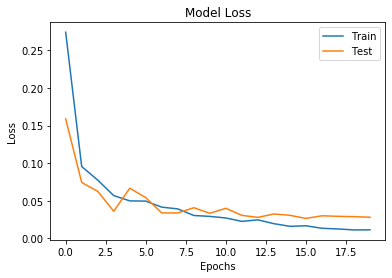

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()

In [88]:
#help(np.argmax)

In [41]:
#Predicting results for Test dataset
pred_digits_test=np.argmax(model.predict(df_test),axis=1)
image_id_test=[]
for i in range (len(pred_digits_test)):
    image_id_test.append(i+1)
d={'ImageId':image_id_test,'Label':pred_digits_test}
answer=pd.DataFrame(d)
answer.to_csv('answer.csv',index=False)

In [42]:
pred_digits_test.dtype

dtype('int64')

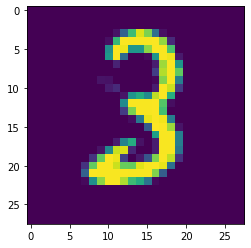

3

In [55]:
#Test with random samples
from matplotlib import pyplot
from scipy.misc import toimage
from keras import backend as K
pyplot.imshow((df_test[4].reshape(28,28)))
pyplot.show()
pred_digits_test[4]